In [ ]:
python -m pip --upgrade nni

In [7]:
from tensorflow import keras
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
import nni
from keras.callbacks import Callback

In [2]:
NUM_CLASSES = 10

def load_data():

    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)
    y_train = to_categorical(y_train, NUM_CLASSES)
    y_test = to_categorical(y_test, NUM_CLASSES)

    return (x_train, y_train), (x_test,y_test)

In [4]:
def build_model():

    model = Sequential([
    Conv2D(32, 3, activation= 'relu'),
    Conv2D(54, 3, activation ='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense (188, activation="relu"),
    Dense(10, activation='softmax')
           ])
    optimizer = keras.optimizers.Adam (learning_rate = 0.004314536738523743)
    model.compile(optimizer = optimizer, loss= 'categorical_crossentropy', metrics=['accuracy'])

    return model

In [6]:
(x_train, y_train), (x_test, y_test) = load_data()

model = build_model()

from keras.callbacks import Callback

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch+1}/{self.params["epochs"]} - loss: {logs["loss"]:.4f} - accuracy: {logs["accuracy"]:.4f}')

model.fit(x_train, y_train, batch_size=200, epochs=10, validation_data=(x_test, y_test), callbacks=[CustomCallback()])


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9009 - loss: 0.3031Epoch 1/10 - loss: 0.1247 - accuracy: 0.9606
300/300 ━━━━━━━━━━━━━━━━━━━━ 49s 146ms/step - accuracy: 0.9011 - loss: 0.3025 - val_accuracy: 0.9854 - val_loss: 0.0436
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9900 - loss: 0.0334Epoch 2/10 - loss: 0.0346 - accuracy: 0.9895
300/300 ━━━━━━━━━━━━━━━━━━━━ 47s 157ms/step - accuracy: 0.9900 - loss: 0.0334 - val_accuracy: 0.9839 - val_loss: 0.0497
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9928 - loss: 0.0225Epoch 3/10 - loss: 0.0224 - accuracy: 0.9928
300/300 ━━━━━━━━━━━━━━━━━━━━ 79s 146ms/step - accuracy: 0.9928 - loss: 0.0225 - val_accuracy: 0.9873 - val_loss: 0.0433
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.9956 - loss: 0.0143Epoch 4/10 - loss: 0.0158 - accuracy: 0.9951
300/300 ━━━━━━━━━━━━━━━━━━━━ 46s 154ms/step - accuracy: 0.9956 - loss: 0.0143 - val_accuracy: 0.9880 - val_loss:

NameError: name 'printf' is not defined

In [8]:
loss , acc = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9836 - loss: 0.0770


In [16]:
print(acc)

0.90829998254776


In [17]:
!pip install nni --upgrade

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.
spyder 5.4.1 requires jedi<0.19.0,>=0.17.2, but you have jedi 0.19.0 which is incompatible.
virtualenv 20.25.1 requires filelock<4,>=3.12.2, but you have filelock 3.11.0 which is incompatible.



     ---------------------------------------- 0.0/46.7 kB ? eta -:--:--
     ---------------------------------------- 46.7/46.7 kB 2.4 MB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
   ---------------------------------------- 0.0/58.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/58.8 MB 3.5 MB/s eta 0:00:17
   ---------------------------------------- 0.4/58.8 MB 4.5 MB/s eta 0:00:13
   ---------------------------------------- 0.5/58.8 MB 4.2 MB/s eta 0:00:14
   ---------------------------------------- 0.7/58.8 MB 4.4 MB/s eta 0:00:14
    --------------------------------------- 0.8/58.8 MB 4.4 MB/s eta 0:00:14
    --------------------------------------- 1.0/58.8 MB 4.1 MB/s eta 0:00:15
    --------------------------------------- 1.2/58.8 MB 4.1 MB/s eta 0:00:14
    --------------------------------------- 1.4/58.8 MB 4.1 MB/s eta 0:00:14
   - -------------------------------------- 1.6/58.8 MB 4.2 MB/s eta 0:00:14
   - -------------

## Defining the search space

In [9]:
search_space = {
    "filter_size_c1" : {'_type' : 'choice', '_value' : [32,64,128]},
    "filter_size_c2" : {'_type' : 'choice', '_value' : [32,64,128]},
    
    "kernel_size_c1" : {'_type' : 'choice', '_value' : [3,5]},
    "kernel_size_c2" : {'_type' : 'choice', '_value' : [3,5]},
    
    "learning_rate" : {'_type' : 'uniform', '_value' : [0.001,0.01]},
    
    "nb_units" : {'_type' : 'choice', '_value' : [80,100,120]}
}
print(search_space)

{'filter_size_c1': {'_type': 'choice', '_value': [32, 64, 128]}, 'filter_size_c2': {'_type': 'choice', '_value': [32, 64, 128]}, 'kernel_size_c1': {'_type': 'choice', '_value': [3, 5]}, 'kernel_size_c2': {'_type': 'choice', '_value': [3, 5]}, 'learning_rate': {'_type': 'uniform', '_value': [0.001, 0.01]}, 'nb_units': {'_type': 'choice', '_value': [80, 100, 120]}}


In [14]:
NUM_CLASSES = 10

def load_data():

    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)
    y_train = to_categorical(y_train, NUM_CLASSES)
    y_test = to_categorical(y_test, NUM_CLASSES)

    return (x_train, y_train), (x_test,y_test)

In [3]:
def create_model(params):

    model = Sequential([
    Conv2D(params['filter_size_c1'],params['kernel_size_c1'], activation= 'relu'),
    Conv2D(params['filter_size_c2'],params['kernel_size_c2'], activation= 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense (params['nb_units'], activation="relu"),
    Dense(NUM_CLASSES, activation='softmax')
           ])
    optimizer = keras.optimizers.Adam (learning_rate = params['learning'])
    model.compile(optimizer = optimizer, loss= 'categorical_crossentropy', metrics=['accuracy'],callbacks =[SendMetrics])

    return model

In [12]:
def run(params) :
    (x_train, y_train), (x_test, y_test) = load_data()
    model = create_model(params)
    model.fit(x_train, y_train, batch_size=200, epochs=10, validation_data=(x_test, y_test))
    nni.report_final_result(acc)


In [2]:
class SendMetrics(Callback) :
    def on_epoch_end(self, epoch, logs = None) :
        nni.report_intermediate_result(logs['val_accuracy'])

In [ ]:
from nni.experiment import Experiment 

experiment = Experiment("local")
experiment.config.trial_command = "python model.py"
experiment.config.trial_code_directory = '.'
experiment.config.search_space = search_space
experiment.config.tuner.name = "TPE"
experiment.config.trial_concurrency = 1
experiment.config.max_trial_number = 10
experiment.run(80) 

[2024-04-27 22:22:50] Creating experiment, Experiment ID: aejq6bv5
[2024-04-27 22:22:50] Starting web server...
[2024-04-27 22:22:59] WARNING: Timeout, retry...
[2024-04-27 22:23:05] Setting up...
[2024-04-27 22:23:09] Web portal URLs: http://192.168.56.1:80 http://169.254.83.111:80 http://172.17.0.86:80 http://192.168.137.1:80 http://192.168.137.236:80 http://127.0.0.1:80


In [9]:
import psutil

def stop_port(port):
    for proc in psutil.process_iter(['pid', 'name', 'connections']):
        try:
            for conn in proc.connections():
                if conn.laddr.port == port:
                    print(f"Process '{proc.name()}' with PID {proc.pid} is using port {port}. Terminating...")
                    proc.terminate()
                    return
        except (psutil.AccessDenied, psutil.NoSuchProcess):
            pass
    print(f"No process found using port {port}.")

# Example usage
stop_port(8080)  # Replace 8080 with the port you want to stop


Process 'node.exe' with PID 6312 is using port 8080. Terminating...


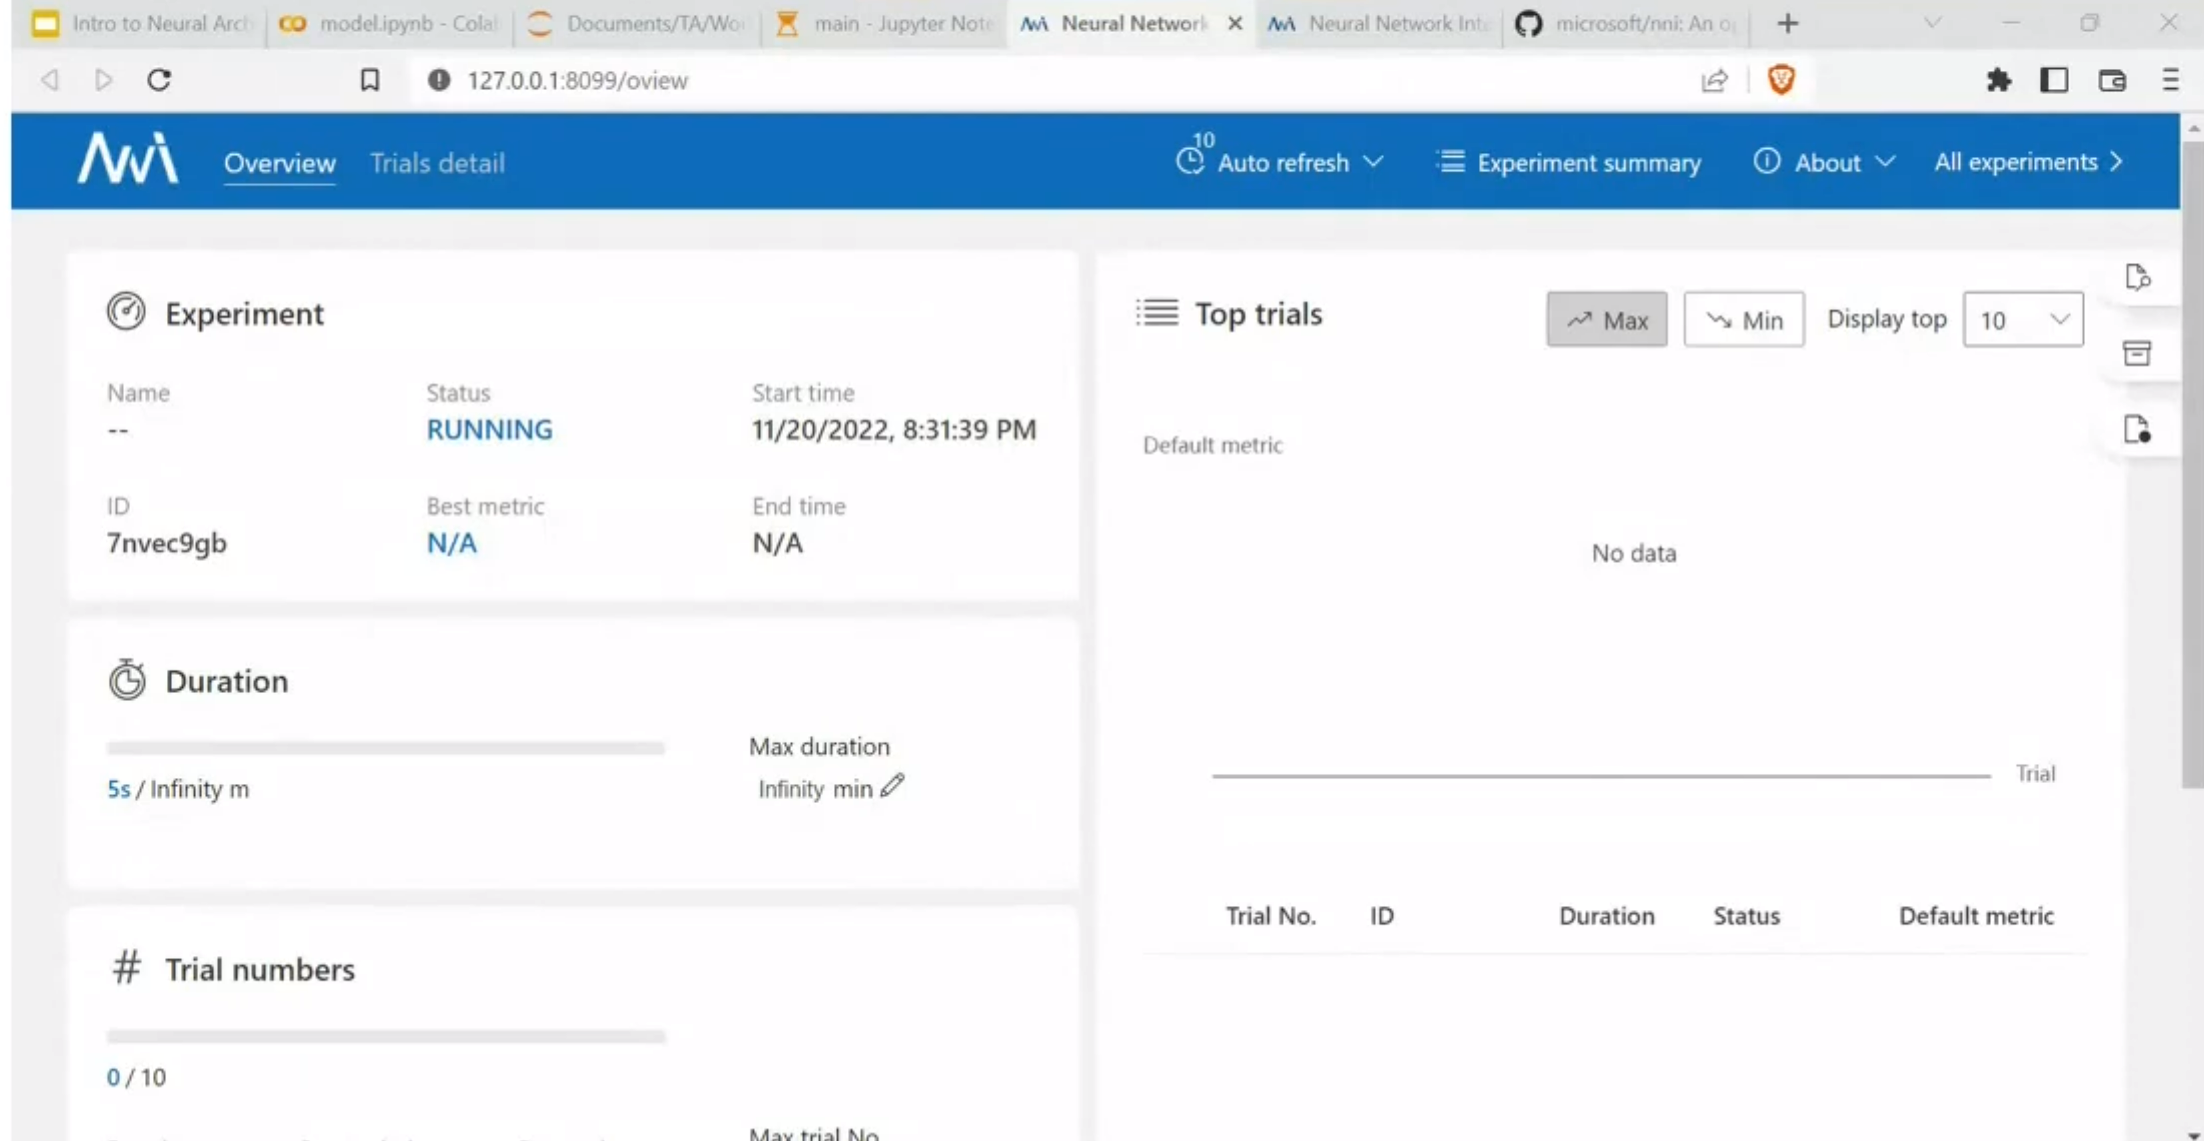

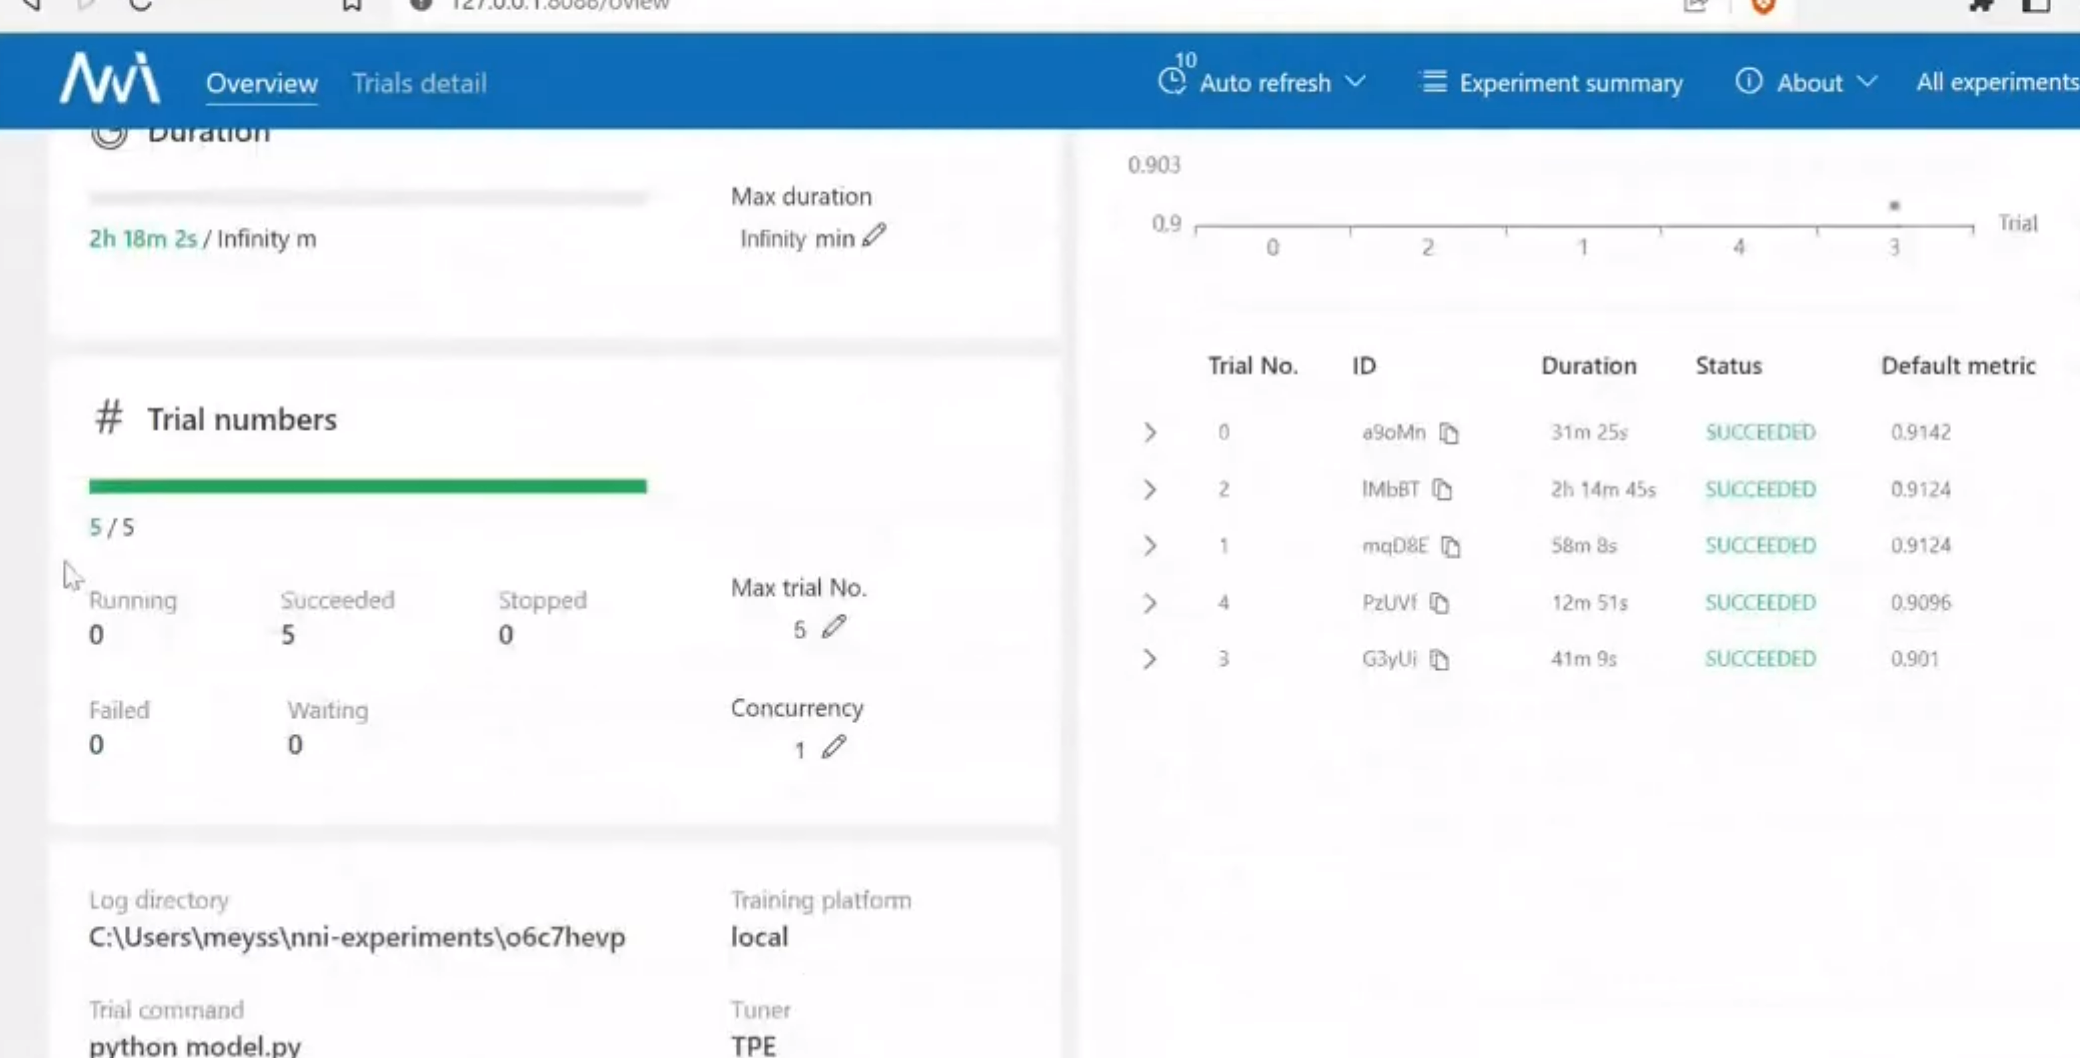

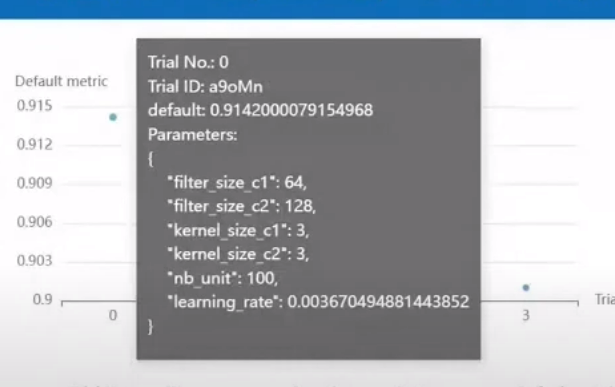

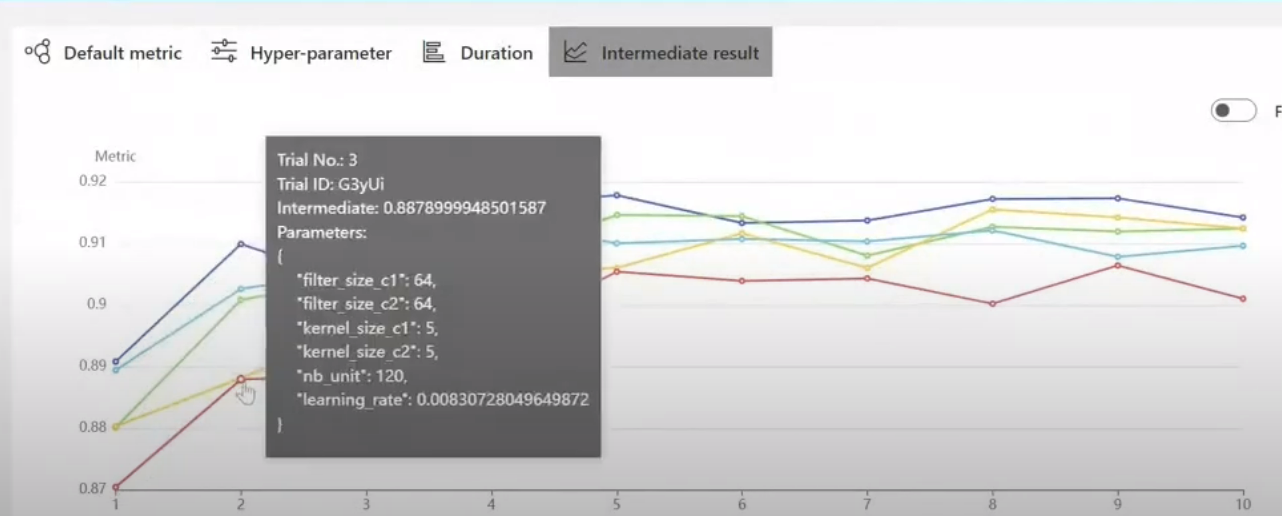

In [10]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist

In [11]:
(x_train, y_train), (x_test, y_test) = load_data()

In [15]:
model = Sequential([
    Conv2D(32, 3, activation= 'relu'),
    Conv2D(54, 3, activation ='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense (188, activation="relu"),
    Dense(10, activation='softmax') ])
optimizer = keras.optimizers.Adam (learning_rate = 0.004314536738523743)
model.compile(optimizer = optimizer, loss= 'categorical_crossentropy', metrics=['accuracy'])

    